In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, glob

from sklearn.model_selection import train_test_split
from skimage.io import imread
from skimage.transform import pyramid_reduce, resize

In [2]:
os.chdir(r'C:\Users\ebool\study\data')

In [3]:
img_list = sorted(glob.glob(r'finding-lungs-in-ct-data\\2d_images\\*.tif'))
mask_list = sorted(glob.glob(r'finding-lungs-in-ct-data\\2d_masks\\*.tif'))

print(len(img_list), len(mask_list))

267 267


In [4]:
img_list[:20]

['finding-lungs-in-ct-data\\\\2d_images\\ID_0000_Z_0142.tif',
 'finding-lungs-in-ct-data\\\\2d_images\\ID_0001_Z_0146.tif',
 'finding-lungs-in-ct-data\\\\2d_images\\ID_0002_Z_0162.tif',
 'finding-lungs-in-ct-data\\\\2d_images\\ID_0003_Z_0132.tif',
 'finding-lungs-in-ct-data\\\\2d_images\\ID_0004_Z_0066.tif',
 'finding-lungs-in-ct-data\\\\2d_images\\ID_0005_Z_0066.tif',
 'finding-lungs-in-ct-data\\\\2d_images\\ID_0006_Z_0206.tif',
 'finding-lungs-in-ct-data\\\\2d_images\\ID_0007_Z_0211.tif',
 'finding-lungs-in-ct-data\\\\2d_images\\ID_0008_Z_0065.tif',
 'finding-lungs-in-ct-data\\\\2d_images\\ID_0009_Z_0114.tif',
 'finding-lungs-in-ct-data\\\\2d_images\\ID_0010_Z_0259.tif',
 'finding-lungs-in-ct-data\\\\2d_images\\ID_0011_Z_0156.tif',
 'finding-lungs-in-ct-data\\\\2d_images\\ID_0012_Z_0167.tif',
 'finding-lungs-in-ct-data\\\\2d_images\\ID_0013_Z_0047.tif',
 'finding-lungs-in-ct-data\\\\2d_images\\ID_0014_Z_0116.tif',
 'finding-lungs-in-ct-data\\\\2d_images\\ID_0015_Z_0136.tif',
 'findin

In [5]:
mask_list[:20]

['finding-lungs-in-ct-data\\\\2d_masks\\ID_0000_Z_0142.tif',
 'finding-lungs-in-ct-data\\\\2d_masks\\ID_0001_Z_0146.tif',
 'finding-lungs-in-ct-data\\\\2d_masks\\ID_0002_Z_0162.tif',
 'finding-lungs-in-ct-data\\\\2d_masks\\ID_0003_Z_0132.tif',
 'finding-lungs-in-ct-data\\\\2d_masks\\ID_0004_Z_0066.tif',
 'finding-lungs-in-ct-data\\\\2d_masks\\ID_0005_Z_0066.tif',
 'finding-lungs-in-ct-data\\\\2d_masks\\ID_0006_Z_0206.tif',
 'finding-lungs-in-ct-data\\\\2d_masks\\ID_0007_Z_0211.tif',
 'finding-lungs-in-ct-data\\\\2d_masks\\ID_0008_Z_0065.tif',
 'finding-lungs-in-ct-data\\\\2d_masks\\ID_0009_Z_0114.tif',
 'finding-lungs-in-ct-data\\\\2d_masks\\ID_0010_Z_0259.tif',
 'finding-lungs-in-ct-data\\\\2d_masks\\ID_0011_Z_0156.tif',
 'finding-lungs-in-ct-data\\\\2d_masks\\ID_0012_Z_0167.tif',
 'finding-lungs-in-ct-data\\\\2d_masks\\ID_0013_Z_0047.tif',
 'finding-lungs-in-ct-data\\\\2d_masks\\ID_0014_Z_0116.tif',
 'finding-lungs-in-ct-data\\\\2d_masks\\ID_0015_Z_0136.tif',
 'finding-lungs-in-ct-da

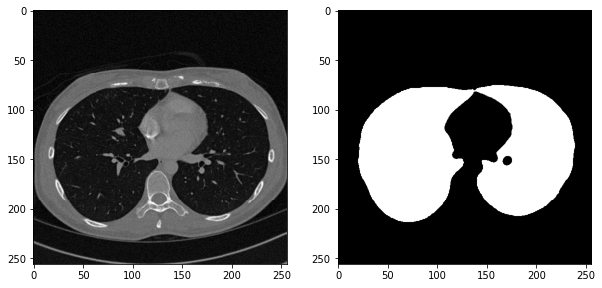

In [6]:
IMG_SIZE = 256

x_data, y_data = np.empty((2, len(img_list), IMG_SIZE, IMG_SIZE, 1), dtype=np.float32)

for i, img_path in enumerate(img_list):
    img = imread(img_path)
    img = resize(img, output_shape=(IMG_SIZE, IMG_SIZE, 1), preserve_range=True)
    x_data[i] = img
    
for i, img_path in enumerate(mask_list):
    img = imread(img_path)
    img = resize(img, output_shape=(IMG_SIZE, IMG_SIZE, 1), preserve_range=True)
    y_data[i] = img
    
y_data /= 255.

fig, ax = plt.subplots(1, 2, figsize=(10,8))
ax[0].imshow(x_data[12].squeeze(), cmap='gray')
ax[1].imshow(y_data[12].squeeze(), cmap='gray')

In [7]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1)

np.save('x_train.npy', x_train)
np.save('y_train.npy', y_train)
np.save('x_val.npy', x_val)
np.save('y_val.npy', y_val)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(240, 256, 256, 1) (240, 256, 256, 1)
(27, 256, 256, 1) (27, 256, 256, 1)
